In [1]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('dataset/video_games_2016.csv')

In [ ]:
import seaborn as sns 

df = df[[ "NA_Sales",
         "EU_Sales",
         "JP_Sales",
         "Other_Sales",
         "Global_Sales",
         "Critic_Score",
         "Critic_Count",
         "User_Score"
           ]]

# print(df.head())

plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap='Reds')
plt.title('Corr.')
plt.show()

/tmp/ipykernel_2859895/3517418689.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Greatest'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1).map(column_to_number)
/tmp/ipykernel_2859895/3517418689.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
/tmp/ipykernel_2859895/3517418689.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

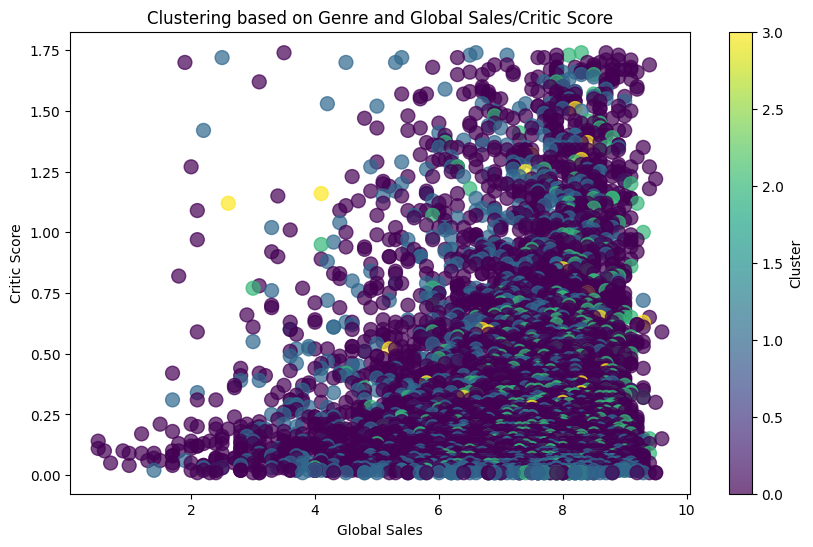

In [5]:
from sklearn.cluster import KMeans
# from sklearn.preprocessing import OneHotEncoder
from kmodes.kmodes import KModes 

df.dropna(inplace=True)

Q1 = df['Global_Sales'].quantile(0.0)
Q3 = df['Global_Sales'].quantile(0.95)

df = df[(df['Global_Sales'] >= Q1 ) & (df['Global_Sales'] <= Q3 )]

column_to_number = {
    'NA_Sales': 1,
    'EU_Sales': 2,
    'JP_Sales': 3,
    'Other_Sales': 4
}

df['Greatest'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1).map(column_to_number)
# print( df.head() )

X = df[[ "User_Score" ]].copy()

df.dropna(inplace=True)

cluster_k = KModes( n_clusters=4, random_state=42 )
# kmeans = KMeans( n_clusters=10, random_state=42 )

df['Cluster'] = cluster_k.fit_predict(X)


plt.figure(figsize=(10, 6))
plt.scatter( df['User_Score'], df['Global_Sales'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)

plt.xlabel('Global Sales')
plt.ylabel('Critic Score')

plt.colorbar(label='Cluster')
plt.title('Clustering based on Genre and Global Sales/Critic Score')

plt.show()

In [ ]:
# Checar correlações interessantes 
# Sample data

# Calculate the IQR for Column1
Q1 = df['Global_Sales'].quantile(0.0)
Q3 = df['Global_Sales'].quantile(0.95)

# Filter out the outliers from Global_Sales
df_fi = df[(df['Global_Sales'] >= Q1 ) & (df['Global_Sales'] <= Q3 )]

plt.scatter(
    df_fi['User_Score'],
    df_fi['']
)

# Add labels and title
plt.xlabel('Nota Usuários')
plt.ylabel('Vendas totais')
plt.title('A')

# Show the plot
plt.show()

In [ ]:
df["Publisher"] = df["Publisher"].astype('category').cat.codes
df["Platform"] = df["Platform"].astype('category').cat.codes
df["Genre"] = df["Genre"].astype('category').cat.codes
df["Developer"] = df["Developer"].astype('category').cat.codes

df["Critic_Score"] = df["Critic_Score"].fillna(0)
df["JP_Sales"] = df["JP_Sales"].fillna(0)

X = np.array(df[[
    # "Genre",
    # "Platform",
    "Critic_Score",
    "User_Score",
    "Developer",
    # "Publisher",
    "JP_Sales",
    "EU_Sales",
    "NA_Sales",
]])

# Criando um vetor com as espécies de todos os registros de flores
y = np.array(df['Genre'])


In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo os conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn import tree

modeloarvoredecisao = tree.DecisionTreeClassifier(criterion='entropy')     

In [ ]:
modeloarvoredecisao.fit(X_treinamento, y_treinamento)

In [ ]:
modeloarvoredecisao.score(X_treinamento, y_treinamento)

In [ ]:

from sklearn import metrics
y_predicao = modeloarvoredecisao.predict(X_teste)

print("Acurácia:",metrics.accuracy_score(y_teste, y_predicao))
print("Precisão:",metrics.precision_score(y_teste, y_predicao, average=None))
print("Recall:",metrics.recall_score(y_teste, y_predicao, average=None))
print("F1-score:",metrics.f1_score(y_teste, y_predicao, average=None))